In [10]:
import pandas as pd

df = pd.read_csv('movies.csv')


In [11]:
pip install seaborn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np 
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt 

In [14]:
df = pd.read_csv('movies.csv')

In [ ]:
# the data that we will be working with is the movies data. we will be breaking it down and looking for some components. 

In [31]:
df.head()

,id,title,genres,original_language,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615096,A Backyard in Nowhere,Documentary,en,0.600,Sellfish Media-Smatis Film,2011-12-03,0,0,52.0,Released,A fly fishing western,0.0,0,Peter A. Christensen-Mathis Eskjær-Peter Lyngb...,NaN,/e2AKUdtWR8xAX3es2sADmYv1kI6.jpg,NaN,NaN
1,937969,A Girl Rogue,Action,zh,0.600,NaN,1983-01-01,0,0,0.0,Released,NaN,0.0,0,Liu Huifang-Qiu Mingxian-Cai Ronghua-Ma Sha-Wa...,NaN,/zRx1SAmbvIW7jtxXqxP2LG1wbM9.jpg,NaN,NaN
2,917386,A - B,Animation,pl,0.876,Studio Miniatur Filmowych,1978-08-22,0,0,4.0,Released,NaN,0.0,0,NaN,NaN,/gbKCTxanoZqYSuPwXCds4LY8LyY.jpg,NaN,NaN
3,822961,A '28-as',Crime,hu,0.600,NaN,1943-01-01,0,0,0.0,Released,NaN,0.0,0,Tivadar Uray-Gerő Mály-Ági Mészáros-Zoltán Mak...,NaN,NaN,NaN,NaN
4,834640,"A ""Normal"" Day for Art Students",Animation,id,0.600,NaN,2020-01-01,0,0,3.0,Released,NaN,0.0,0,NaN,short film,NaN,NaN,NaN


In [32]:
df.isnull().sum()

id                           0
title                        2
genres                       0
original_language            0
popularity                   0
production_companies    135859
release_date              9649
budget                       0
revenue                      0
runtime                  11868
status                       0
tagline                 260604
vote_average                 0
vote_count                   0
credits                  76947
keywords                198633
poster_path              70879
backdrop_path           204817
recommendations         290292
dtype: int64

In [ ]:
#what is the average vote from all the movies?

In [34]:
df['vote_average'].mean()


Average vote: 2.4999892571976785


In [ ]:
#Movie with the Highest popularity:

In [65]:
highest_rated_movie = df.loc[df['popularity'].idxmax()]
highest_rated_movie['title']


'The Eighth Clause'

In [ ]:
#Number of Movies in the Dataset:

In [61]:
len(df)

300201

In [ ]:
#Average Runtime of Movies:

In [66]:
df['runtime'].mean()

52.529537028366505

In [ ]:
#Actor Appearing in the Most Movies:


In [68]:
actor_counts = df['credits'].str.split('|', expand=True).stack().value_counts()
most_common_actor = actor_counts.idxmax()
print("Actor appearing in the most movies:", most_common_actor)


Actor appearing in the most movies: Mel Blanc


In [ ]:
# what are the top 3 genres

In [39]:

genres = df['genres'].str.split('|', expand=True).stack()

genre_counts = genres.value_counts()

sorted_genres = genre_counts.sort_values(ascending=False)

top_3_genres = sorted_genres.head(3)

print("Top 3 genres:")
print(top_3_genres)


Top 3 genres:
Documentary    92275
Drama          77427
Comedy         44716
Name: count, dtype: int64


In [ ]:
# use groupby to find the top 3 genres

In [40]:

genres = df['genres'].str.split('|', expand=True)

genres_stacked = genres.stack()

genre_counts = genres_stacked.groupby(level=0).value_counts()

sorted_genres = genre_counts.sort_values(ascending=False)

top_3_genres = sorted_genres.head(3)

print("Top 3 genres:")
print(top_3_genres)


Top 3 genres:
0       Documentary    1
200122  Documentary    1
200138  Documentary    1
Name: count, dtype: int64


In [ ]:
#Identify movies with the highest average ratings.


In [45]:
average_ratings = df.groupby('title')['popularity'].mean()

# Sort the movies by average rating in descending order
sorted_movies = average_ratings.sort_values(ascending=False)

# Select the top 10 movies with the highest average ratings
top_movies = sorted_movies.head(10)

print("Top 10 movies with the highest popoluarity:")
print(top_movies)

Top 10 movies with the highest popoluarity:
title
The Eighth Clause               2259.303
Lord of the Streets             1691.825
Berlin Drifters                  918.173
There Are No Saints              903.860
Bar Fight                        626.541
The Trip 6                       610.333
The Whale                        499.494
Avatar: Scene Deconstruction     473.433
The Offering                     440.291
Evil Eye                         435.109
Name: popularity, dtype: float64


In [ ]:
#how many movies have released as their status

In [48]:
released_movies = df[df['status'] == 'Released']
released_count


298110

In [ ]:
#plot genre according number of movies

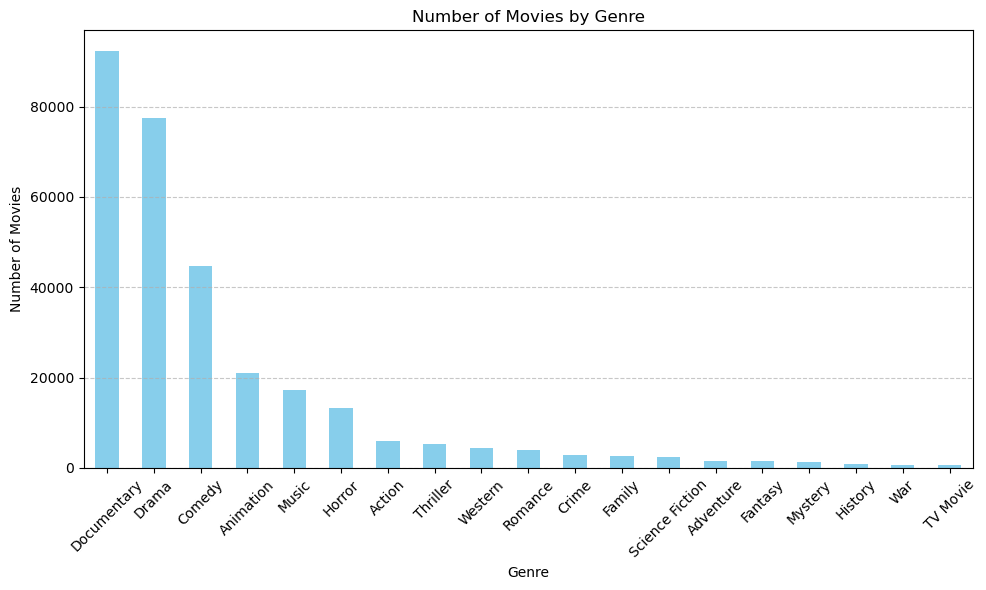

In [69]:

import matplotlib.pyplot as plt

genres_split = df['genres'].str.split('|', expand=True)
stacked_genres = genres_split.stack()

genre_counts = stacked_genres.value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


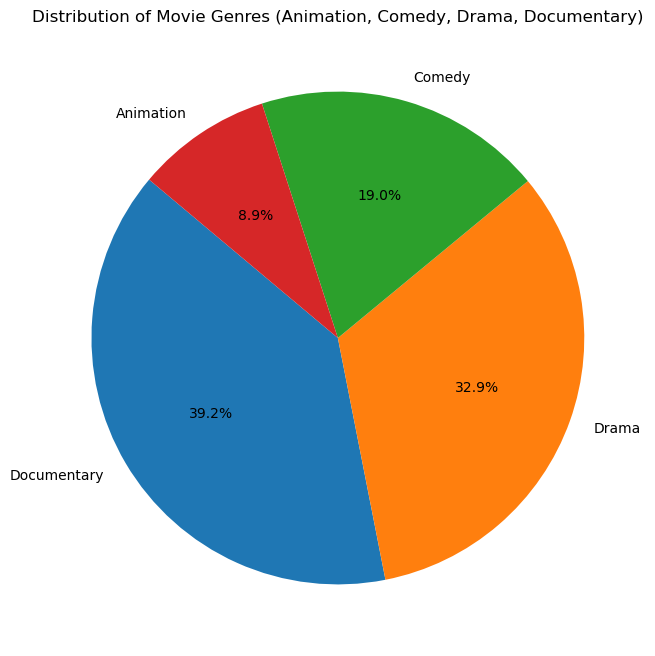

In [71]:
filtered_df = df[df['genres'].str.contains('Animation|Comedy|Drama|Documentary', regex=True)]

genres_split = filtered_df['genres'].str.split('|', expand=True)

stacked_genres = genres_split.stack()

genre_counts = stacked_genres.value_counts()

genre_counts_df = pd.DataFrame(genre_counts, columns=['count'])

# Plot the pie chart
genre_counts_df.plot.pie(y='count', figsize=(8, 8), autopct='%1.1f%%', startangle=140, legend=False)
plt.title('Distribution of Movie Genres (Animation, Comedy, Drama, Documentary)')
plt.ylabel('')  
plt.show()


In [ ]:
#In this project we have looked at the avergaes of 